In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read in `road-accidents.csv`
data = pd.read_csv("road-accidents.csv", comment="#", sep="|")
data

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [3]:
# Save the number of rows columns as a tuple
rows_and_cols = data.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

There are 51 rows and 5 columns.



In [4]:
# Generate an overview of the DataFrame
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [5]:
# Display the first five rows of the DataFrame
data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [7]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = data.describe()
print(sum_stat_car)


       drvr_fatl_col_bmiles  ...  perc_fatl_1st_time
count             51.000000  ...            51.00000
mean              15.790196  ...            88.72549
std                4.122002  ...             6.96011
min                5.900000  ...            76.00000
25%               12.750000  ...            83.50000
50%               15.600000  ...            88.00000
75%               18.500000  ...            95.00000
max               23.900000  ...           100.00000

[8 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


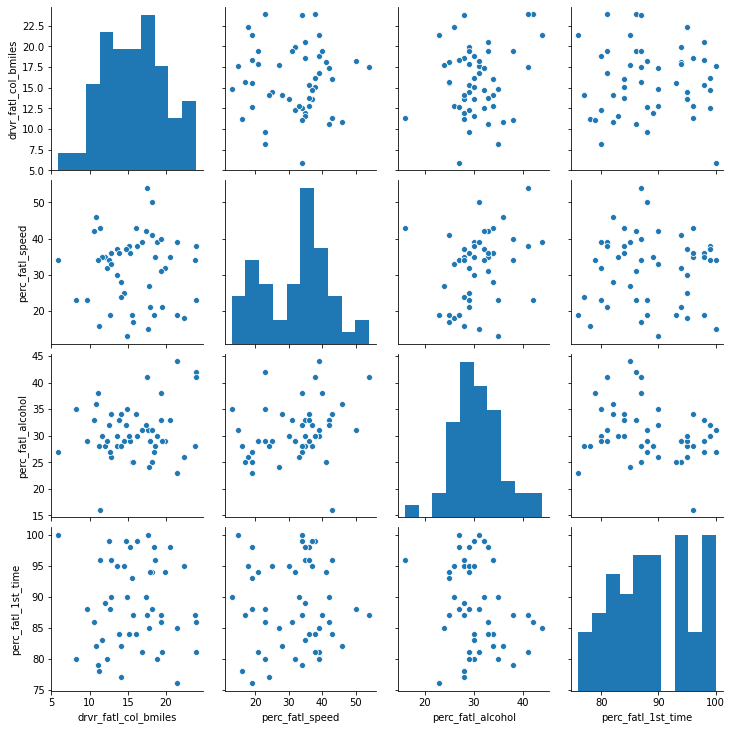

In [8]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(data)

In [9]:
# Compute the correlation coefficent for all column pairs
corr_columns = data.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [10]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = data[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target = data["drvr_fatl_col_bmiles"]

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

In [12]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [13]:
# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The cumulative variance of the first two principal components is 0.7947


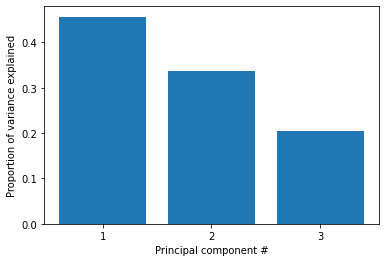

In [14]:
# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

In [16]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)
p_comps

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

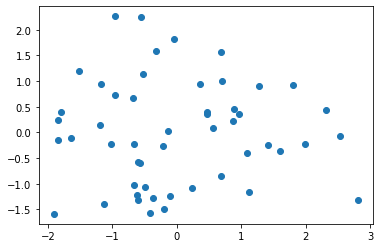

In [17]:
# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1,p_comp2)

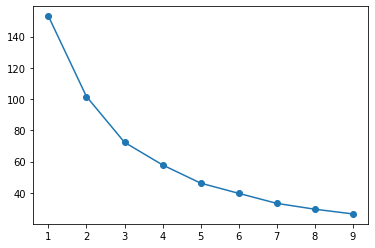

In [19]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

In [21]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
p_comps = km.fit_transform(features_scaled)
p_comps

array([[2.41009236, 1.16454028, 1.9272513 ],
       [1.22842574, 2.45125019, 2.71865478],
       [0.40692142, 2.24241211, 2.40530927],
       [1.45855092, 3.21967852, 1.87228807],
       [1.01809715, 1.60372184, 1.70432446],
       [0.61114583, 2.10510608, 2.42798429],
       [2.91933032, 0.84589383, 2.99827709],
       [0.9404067 , 2.37240596, 2.95881003],
       [0.7630599 , 2.83488212, 2.85206107],
       [1.10211508, 2.6283112 , 1.64077074],
       [1.47812467, 3.13587211, 1.64829732],
       [3.67120526, 2.02554867, 4.28253344],
       [0.63817899, 2.35174591, 2.70386803],
       [1.23566589, 1.75298799, 2.70617321],
       [0.67160437, 2.44146362, 1.82750331],
       [2.03581983, 3.04480432, 1.01152632],
       [1.79016878, 2.50161363, 1.09847886],
       [3.26939693, 3.36267259, 1.45730271],
       [1.07622362, 2.08449761, 2.79551473],
       [1.83911018, 0.99803556, 1.79251276],
       [0.94189283, 2.28898778, 2.80499348],
       [2.74326248, 1.75570971, 1.37655416],
       [2.

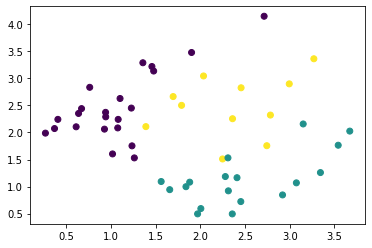

In [22]:
# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:,0], p_comps[:,1], c=km.labels_)

In [23]:
# Create a new column with the labels from the KMeans clustering
data['cluster'] = km.labels_
data

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,0
2,Arizona,18.6,35,28,96,0
3,Arkansas,22.4,18,26,95,0
4,California,12.0,35,28,89,0
5,Colorado,13.6,37,28,95,0
6,Connecticut,10.8,46,36,82,1
7,Delaware,16.2,38,30,99,0
8,District of Columbia,5.9,34,27,100,0
9,Florida,17.9,21,29,94,0


In [24]:
# Reshape the DataFrame to the long format
melt_car = pd.melt(data, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)
melt_car 

,cluster,measurement,percent
0,1,perc_fatl_speed,39
1,0,perc_fatl_speed,41
2,0,perc_fatl_speed,35
3,0,perc_fatl_speed,18
4,0,perc_fatl_speed,35
...,...,...,...
148,2,perc_fatl_1st_time,88
149,1,perc_fatl_1st_time,86
150,0,perc_fatl_1st_time,87
151,1,perc_fatl_1st_time,84


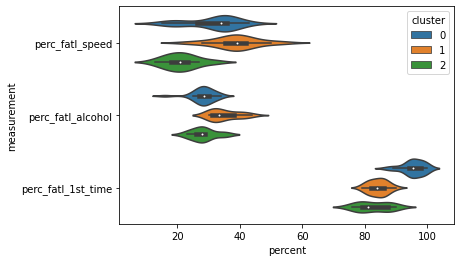

In [25]:
# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=melt_car["percent"], y=melt_car["measurement"], hue=melt_car["cluster"])


In [26]:
# Read in the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')
miles_driven

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [27]:
# Merge the `data` DataFrame with the `miles_driven` DataFrame
car_acc_miles = pd.merge(data, miles_driven, on="state")
car_acc_miles

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
0,Alabama,18.8,39,30,80,1,64914
1,Alaska,18.1,41,25,94,0,4593
2,Arizona,18.6,35,28,96,0,59575
3,Arkansas,22.4,18,26,95,0,32953
4,California,12.0,35,28,89,0,320784
5,Colorado,13.6,37,28,95,0,46606
6,Connecticut,10.8,46,36,82,1,31197
7,Delaware,16.2,38,30,99,0,9028
8,District of Columbia,5.9,34,27,100,0,3568
9,Florida,17.9,21,29,94,0,191855


In [28]:
# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles']*car_acc_miles["million_miles_annually"]/1000
car_acc_miles

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,0,4593,83.1333
2,Arizona,18.6,35,28,96,0,59575,1108.0950
3,Arkansas,22.4,18,26,95,0,32953,738.1472
4,California,12.0,35,28,89,0,320784,3849.4080
5,Colorado,13.6,37,28,95,0,46606,633.8416
6,Connecticut,10.8,46,36,82,1,31197,336.9276
7,Delaware,16.2,38,30,99,0,9028,146.2536
8,District of Columbia,5.9,34,27,100,0,3568,21.0512
9,Florida,17.9,21,29,94,0,191855,3434.2045


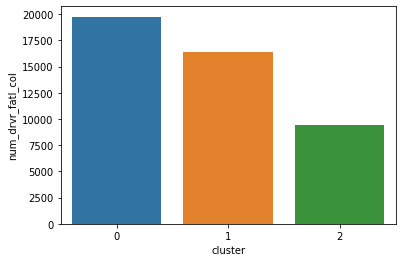

In [29]:
# Create a barplot of the total number of accidents per cluster
sns.barplot(x=car_acc_miles["cluster"], y=car_acc_miles["num_drvr_fatl_col"], data=car_acc_miles, estimator=sum, ci=None)


In [30]:
# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])
count_mean_sum

,count,mean,sum
cluster,,,
0,22,898.378595,19764.3291
1,18,911.406439,16405.3159
2,11,860.505945,9465.5654


 cluster 1 should be a focus for policy intervention and further investigation

In [ ]:
# We can argue that the cluster 1 has the highest no of mean accidents hence it should be our area of focus
# Although the max no of accidents take place in cluster 0 due to its larger size
cluster_num = 1